I appreciate you are here, I hope my project helps you. c:

This notebook has two "chapters" and also contains the section of the code.

# **_A little bit of theory..._**

## *...of the simple pendulum and the origin of the ODEs*

- The part of the pendulum was mostly taken from a book of classical mechanics, if it is needed to remove or modify this part, I´ll do it.

The simple pendulum consists of a point mass M at the lower end of a massless string of length L, which swings freely about its upper end and moves in a vertical plane.

<img src= "https://github.com/zaphkieled/Simple-Pendulum/blob/main/BerkeleyDiagramPendulum.jpg?raw=true" height="336" width="336">

We can see that the distance can be represented by $s = L\theta$ which relates the angle formed by the pendulum string and the vertical axis. Using "s" as our angular displacement, we can obtain the velocity and acceleration.

$$v=\frac{ds}{dt}=L\frac{d\theta}{dt}$$

$$a=\frac{d^{2}s}{dt^{2}}=L\frac{d^{2}\theta}{dt^{2}}$$

We know that there are two forces that influence the pendulum; the weight and the tension of the rope but we can ignore the tension because it does not influence our motion. By having the force of gravity we can use Newton's second law to obtain an equation that describes this motion.

$$mgsen\theta=-mL\frac{d^{2}\theta}{dt^{2}}$$

Note that the negative sign is due to the fact that the acceleration always goes in the opposite direction to the movement.

In this expression we can divide both sides by $mL$ and equal to zero

$$\frac{d^{2}\theta}{dt^{2}} + \frac{g}{L}sen\theta = 0$$

Note that the angular frequency is given by $\omega^{2} ={\frac{g}{L}}$

$$\frac{d^{2}\theta}{dt^{2}} + \omega^{2}sen\theta = 0$$

Now, we know the sin function give us small values when the angle takes small values, so we can substitue the function $\sin\theta$ for its taylor serie which is determined by:

$$\sum_{n=0}^{\infty}(-1)^{n}\frac{\theta^{2n+1}}{(2n+1)!}$ $\forall \theta$$

writing it on a friendly way looks like this:

$$sen \theta = \theta - \frac{\theta^3}{3!}+ \frac{\theta^5}{5!}-\frac{\theta^7}{7!}+...$$

With this, we can approximate the "behaviour" of the pendulum using certain terms of the series and taking the later values as the error of the approximation. By rewriting the equations using the first term in one and in the other the first two terms of the series we obtain:

$$\frac{d^2 \theta}{dt^2}+\omega^2\theta=0$$

$$\frac{d^2 \theta}{dt^2}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$$

## *...about the method used*


The method used is called numerical differentiation and it consists on taking the Taylor polynomial wher we can obtain a formule for the $n$ derivative term


$$f(x_{i+1}) = f(x_{i}) + f'(x_{i})h + \frac{f''(x_{i})}{2!}h^{2}+...$$


if we truncate our serie at the second term we can isolate our second derivative term we can obtain:

$$f''(x_{i+1}) = \frac{f(x_{i+2})-2f(x_{i+1})+f(x_{i})}{h^{2}}+O(h)$$

$O(h)$ is our estimated error that involves all the left terms we decide to ignore. Rewriting it we can get:

$$f''(\theta_{i+1}) = \frac{f(\theta_{i+1})-2f(\theta_{i})+f(\theta_{i-1})}{h^{2}}$$

to be able to implementing in the code we can think change it to:

$$\theta_{i+1} = \frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{h^{2}}$$

since $h$ is our size of step respect to time we can write it as a differential (though we can leave it as $h$)

$$\theta_{i+1} = \frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{\Delta t^{2}}$$

Now, we can substitute this new term in our ODEs, from:

$$\frac{d^{2}\theta}{dt^{2}} + \omega^{2}sen\theta = 0$$

$$\frac{d^2 \theta}{dt^2}+\omega^2\theta=0$$

$$\frac{d^2 \theta}{dt^2}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$$

we get now:

$$\frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{\Delta t^{2}} + \omega^{2}sen\theta = 0$$

$$\frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{\Delta t^{2}}+\omega^2\theta=0$$

$$\frac{\theta_{i+1}-2\theta_{i}+\theta_{i-1}}{\Delta t^{2}}+\omega^2\theta-\frac{\omega^2}{6}\theta^3=0$$

and again we isolate the term $\theta_{i+1}$

$$\theta_{i+1} = - \omega^{2}sen\theta\Delta t^{2} +2\theta_{i}-\theta_{i-1}$$

$$\theta_{i+1} = - \omega^{2}\theta\Delta t^{2} +2\theta_{i}-\theta_{i-1}$$

$$\theta_{i+1} = - \omega^{2}\theta\Delta t^{2} +\frac{\omega^2}{6}\theta^3 \Delta t^{2} +2\theta_{i}-\theta_{i-1}$$

These expressions are the ones used at the code.

P.D. At the code I decided to use $\frac{g}{L}$ instead of $\omega^{2}$

# **_Code of the simple pendulum_**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
"general values for ODE and numerical method"
g = 9.81 #gravity
l = 1 #length of massless rope/rod

n = 800 #steps/iterations
time = 4 #interval/range of time

dt= time/n #differential o size of step (h)

interval = np.linspace(0,time,n) #this is only for graphing

"initial conditions small angles"
initial_angle = 6.0 #angle in degrees. you can decide which one to us 
theta0 = np.radians(initial_angle) 
#w0 = np.radians(0.0) #initial velocity

"initial conditions for <<non small>> angles" 
Initial_Big_Angle = 90.0 #insertar el angulo en grados
Theta0 = np.radians(Initial_Big_Angle) #angulo inicial
#w00 = np.radians(0.0) #velocidad inicial

This is how is structured the first ODE in the first function 

$$\theta_{t+1} = \omega ^2 sin(\theta) \Delta t^2 + 2\theta_t - \theta_{t-1}$$

In [ ]:
"2nd order ODE of a simple pendulum"
def pendulo(the0,dt): #it asks for initial angle and the size of the step
  theta=[]
  theta.append(the0)

  for i in range(0,n-1):
    theta.append(-(g/l)*np.sin(theta[i])*dt**2 + 2*theta[i] - theta[i-1])

  return theta

"Approximation with Taylor series, 1 term"
def aprox1(the0,dt): 
  theta1=[]
  theta1.append(the0)

  for i in range(0,n-1):
    theta1.append( -(g/l)*(theta1[i])*dt**2 + 2*theta1[i] - theta1[i-1] )

  return theta1

"Approximation with Taylor series, 2 terms"
def aprox2(the0,dt): 
  theta2=[]
  theta2.append(the0)

  for i in range(0,n-1):
    theta2.append( -(g/l)*(theta2[i])*dt**2 +((1/6)*(g/l)*(theta2[i]**3)*dt**2) + 2*theta2[i] - theta2[i-1] )

  return theta2

 #I had issues trying to create only one function and defining the ODEs in another block
 #so, I did it with three similar functions each one for each ODE 

In [ ]:
"solutions for small angles"
solution1 = pendulo(theta0,dt)
solution2 = aprox1(theta0,dt)
solution3 = aprox2(theta0,dt)

"solution for big angles"
SOLUTION1 = pendulo(Theta0,dt)
SOLUTION2 = aprox1(Theta0,dt)
SOLUTION3 = aprox2(Theta0,dt)

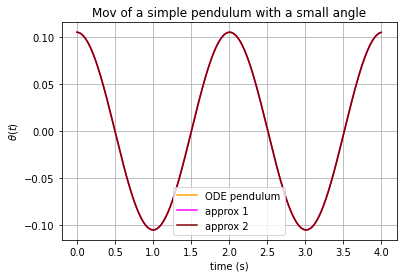

In [ ]:
plt.plot(interval,solution1,label="ODE pendulum",color='orange')
plt.plot(interval,solution2,label="approx 1",color='magenta')
plt.plot(interval,solution3,label="approx 2",color='maroon')

plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$')
plt.legend()
plt.grid(True)
plt.title("Mov of a simple pendulum with a small angle")
plt.show()

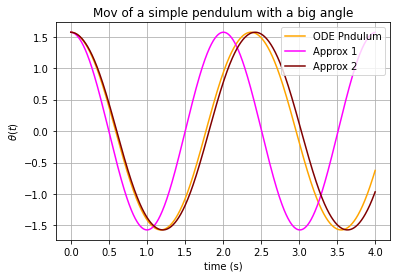

In [ ]:
plt.plot(interval,SOLUTION1,label="ODE Pndulum",color='orange')
plt.plot(interval,SOLUTION2,label="Approx 1",color='magenta')
plt.plot(interval,SOLUTION3,label="Approx 2",color="maroon")

plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$')
plt.legend()
plt.grid(True)
plt.title("Mov of a simple pendulum with a big angle")
plt.show()

# References


(Most ot them are at spanish since are the ones I used)
- C. Kittel, W.D. Knight, M.A. Ruderman, A.C. Helmholz y B.j. Moyer. Berkeley Physics Course, Volumen 1 Mecánica, Editorial Reverté.
- D. Halliday, R. Resnick y K.S. Krane, Fundamentos de Física Vol. 1, 5ta Edición, Editorial Wiley.
- J. Stewart, Calculo De Una Variable, Trascendentes tempranas. 8va Edición Editorial Cengage.
- S. Chapra, Applied Numerical Methods with MATLAB for Engineers and Scientists, Third Edition, Ed. McGrawHill.